In [15]:
import tensorflow 

In [16]:
from tensorflow.keras.datasets import fashion_mnist
data  = fashion_mnist.load_data()

In [17]:
train, test = data
(x_train, y_train) = train
(x_test, y_test)= test

In [18]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [19]:
x_train[30].shape

(28, 28)

In [20]:
class_names=['0 T-shirt/top', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat',
    '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']

def get_name(n):
    return class_names[n]

5 Sandal


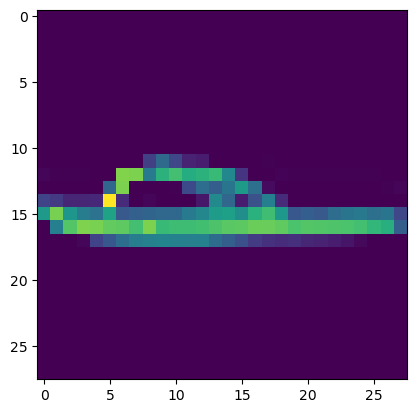

In [21]:
import matplotlib.pyplot as plt 
plt.imshow(x_train[30])
print(get_name(y_train[30]))

In [22]:
x_train[30]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [23]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [24]:
x_train.shape

(60000, 784)

In [25]:
x_test.shape

(10000, 784)

In [26]:
x_train = x_train/255
x_test = x_test/255

In [28]:
from tensorflow.keras.models import Sequential
model = Sequential()

In [31]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1_l2

l1_reg = 0.001
l2_reg = 0.001

model.add(Dense(units=512, input_shape=(784, )))
model.add(Dense(units=256, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
model.add(Dropout(0.4))
model.add(Dense(units=128, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
model.add(Dropout(0.2))
model.add(Dense(units=56, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 56)               

In [32]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

In [43]:
from tensorflow.keras.callbacks import EarlyStopping 
callbacks  = EarlyStopping(monitor='val_loss', patience=5, verbose=1 )
history = model.fit(x_train, y_train, epochs=80, batch_size=30, verbose=1, validation_data=(x_test, y_test),callbacks=(callbacks))

Epoch 1/80


2023-12-13 08:02:30.567885: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2000/2000 [==============================] - 15s 7ms/step - loss: 1.9130 - sparse_categorical_accuracy: 0.7506 - val_loss: 0.8275 - val_sparse_categorical_accuracy: 0.8174
Epoch 2/80
2000/2000 [==============================] - 16s 8ms/step - loss: 0.8159 - sparse_categorical_accuracy: 0.8065 - val_loss: 0.7101 - val_sparse_categorical_accuracy: 0.8286
Epoch 3/80
2000/2000 [==============================] - 16s 8ms/step - loss: 0.7605 - sparse_categorical_accuracy: 0.8173 - val_loss: 0.7026 - val_sparse_categorical_accuracy: 0.8276
Epoch 4/80
2000/2000 [==============================] - 18s 9ms/step - loss: 0.7385 - sparse_categorical_accuracy: 0.8256 - val_loss: 0.6861 - val_sparse_categorical_accuracy: 0.8354
Epoch 5/80
2000/2000 [==============================] - 18s 9ms/step - loss: 0.7390 - sparse_categorical_accuracy: 0.8275 - val_loss: 0.7135 - val_sparse_categorical_accuracy: 0.8249
Epoch 6/80
2000/2000 [==============================] - 17s 9ms/step - loss: 0.7147 - sparse_cat

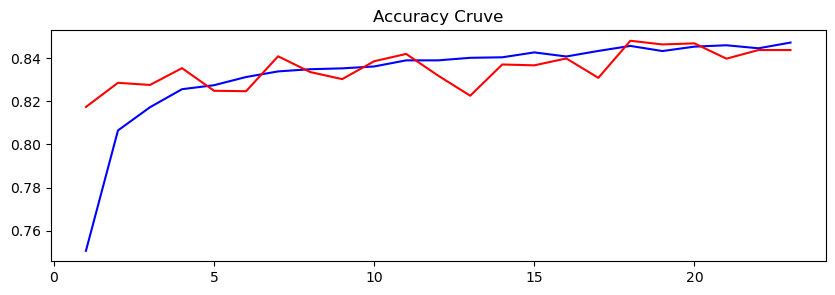

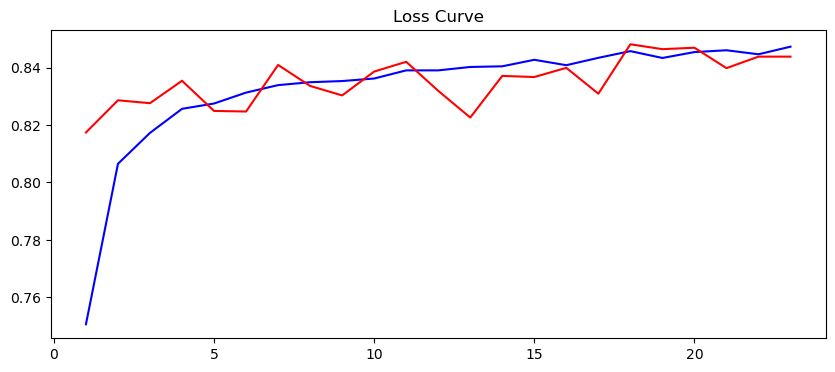

In [49]:
train_accuracy = history.history['sparse_categorical_accuracy']
test_accuracy = history.history['val_sparse_categorical_accuracy']

train_loss = history.history['loss']
test_loss = history.history['val_loss']

epoch  = range(1, len(train_accuracy)+1)

plt.figure(figsize=(10,3))
plt.plot(epoch, train_accuracy, 'b', label='Train_Accuracy')
plt.plot(epoch, test_accuracy, 'r', label='Test_Accuracy')
plt.title("Accuracy Cruve")
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(epoch, train_accuracy, 'b', label='Train Accuracy')
plt.plot(epoch, test_accuracy, 'r', label="Test Accuracy")
plt.title("Loss Curve")
plt.show()